reference https://www.kaggle.com/gaoyuan19930220/xgboost

In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
import xgboost as xgb
import operator
import optuna

from functools import partial
from matplotlib import pylab as plt
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold

/home/sano/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
count_itr = 0

In [3]:
def objective_optuna(X, y, test_X, test_y, trial):
    global count_itr
    print(count_itr, end=' ')
    count_itr += 1
    #最適化するパラメータを指定
    params = {
        'n_estimators': trial.suggest_int('n_estimators',1,1000),
        'gamma': trial.suggest_uniform('gamma',0,1),
        'reg_lambda': trial.suggest_uniform('lambda',0,2),
        'learning_rate': trial.suggest_uniform('learning_rate',0,0.3),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree',0,1),
        'min_child_weight': trial.suggest_uniform('min_child_weight',0,10),
    }
    
    #モデルを定義
    model = xgb.XGBClassifier(random_state=2,**params)
    
#     (train_X, test_X ,train_y, test_y) = train_test_split(X, y, test_size = 0.3, random_state = 2)
    
#     #3-foldクロスバリデーション
#     kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)
#     scores = cross_validate(model, X=X, y=y, cv=kf, scoring='neg_log_loss')
    model.fit(train,labels,eval_metric='logloss')
    pred = model.predict_proba(test_X)
    
    return log_loss(test_y,pred)

In [4]:
#csvデータの呼び出し場所
loadpath = "../input/"
#csvデータの保存場所
savepath = "../output/"

In [5]:
# import input
train = pd.read_csv(loadpath + "train.csv")
test = pd.read_csv(loadpath + "test.csv")
sample = pd.read_csv(loadpath + 'sampleSubmission.csv')
train.set_index('id',inplace=True)
test.set_index('id',inplace=True)

labels = train.target.values
labels = preprocessing.LabelEncoder().fit_transform(labels)

# labels = pd.get_dummies(labels,prefix='Survived')

train.drop('target', axis=1, inplace=True)

In [15]:
(train, test_X ,labels, test_y) = train_test_split(train, labels, test_size = 0.3, random_state = 2)

In [ ]:
f = partial(objective_optuna, train, labels, test_X, test_y)
study = optuna.create_study()
study.optimize(f, n_trials=10000)

0 

[I 2019-02-10 22:48:35,273] Finished a trial resulted in value: 0.5154622208526419. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


1 

[I 2019-02-10 22:50:40,180] Finished a trial resulted in value: 0.5980367141835637. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


2 

[I 2019-02-10 22:53:56,275] Finished a trial resulted in value: 0.5336283223145003. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


3 

[I 2019-02-10 22:56:59,635] Finished a trial resulted in value: 0.554663155926668. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


4 

[I 2019-02-10 23:09:07,912] Finished a trial resulted in value: 0.653710064250842. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


5 

[I 2019-02-10 23:20:29,607] Finished a trial resulted in value: 0.6524232408739242. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


6 

[I 2019-02-10 23:21:00,524] Finished a trial resulted in value: 0.927366798975182. Current best value is 0.5154622208526419 with parameters: {'n_estimators': 733, 'gamma': 0.7371078201478332, 'lambda': 0.06037397096165109, 'learning_rate': 0.22355432442809556, 'max_depth': 15, 'subsample': 0.6533314645086415, 'colsample_bytree': 0.9220693229990583, 'min_child_weight': 2.605968960893051}.


7 

[I 2019-02-10 23:23:43,479] Finished a trial resulted in value: 0.5127564484100184. Current best value is 0.5127564484100184 with parameters: {'n_estimators': 188, 'gamma': 0.7796163446250554, 'lambda': 0.2263429844660374, 'learning_rate': 0.21214300104124587, 'max_depth': 4, 'subsample': 0.47188069698037727, 'colsample_bytree': 0.7684788517785277, 'min_child_weight': 5.631199086377377}.


8 

[I 2019-02-10 23:25:42,904] Finished a trial resulted in value: 0.6303448791439814. Current best value is 0.5127564484100184 with parameters: {'n_estimators': 188, 'gamma': 0.7796163446250554, 'lambda': 0.2263429844660374, 'learning_rate': 0.21214300104124587, 'max_depth': 4, 'subsample': 0.47188069698037727, 'colsample_bytree': 0.7684788517785277, 'min_child_weight': 5.631199086377377}.


9 

[I 2019-02-10 23:36:51,391] Finished a trial resulted in value: 0.467685649096718. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


10 

[I 2019-02-10 23:44:19,690] Finished a trial resulted in value: 1.5520152724385132. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


11 

[I 2019-02-10 23:48:46,867] Finished a trial resulted in value: 0.491457471555817. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


12 

[I 2019-02-10 23:58:32,342] Finished a trial resulted in value: 0.47500938725816316. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


13 

[I 2019-02-11 00:04:10,168] Finished a trial resulted in value: 0.49879285575026355. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


14 

[I 2019-02-11 00:08:14,885] Finished a trial resulted in value: 0.5885317200511165. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


15 

[I 2019-02-11 00:37:12,779] Finished a trial resulted in value: 0.5281566324789109. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


16 

[I 2019-02-11 00:41:04,719] Finished a trial resulted in value: 0.48941034087890917. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


17 

[I 2019-02-11 00:42:23,339] Finished a trial resulted in value: 0.8140581452858042. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


18 

[I 2019-02-11 00:49:34,072] Finished a trial resulted in value: 0.47680510124127434. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


19 

[I 2019-02-11 00:56:15,045] Finished a trial resulted in value: 0.495994920248173. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


20 

[I 2019-02-11 00:58:56,195] Finished a trial resulted in value: 0.6322332435608662. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


21 

[I 2019-02-11 01:15:17,416] Finished a trial resulted in value: 0.48692332122343107. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


22 

[I 2019-02-11 01:23:55,192] Finished a trial resulted in value: 0.4803787393337395. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


23 

[I 2019-02-11 01:24:19,796] Finished a trial resulted in value: 1.5519088022868404. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


24 

[I 2019-02-11 01:28:14,529] Finished a trial resulted in value: 0.475741728118077. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


25 

[I 2019-02-11 01:51:52,891] Finished a trial resulted in value: 0.48348579973983746. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


26 

[I 2019-02-11 02:05:35,088] Finished a trial resulted in value: 0.48619249781717594. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


27 

[I 2019-02-11 02:08:11,985] Finished a trial resulted in value: 0.4812877353128157. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


28 

[I 2019-02-11 02:23:21,939] Finished a trial resulted in value: 0.4785349984080041. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


29 

[I 2019-02-11 02:58:11,905] Finished a trial resulted in value: 0.5048613422839503. Current best value is 0.467685649096718 with parameters: {'n_estimators': 284, 'gamma': 0.3483393018821924, 'lambda': 0.4788851787857924, 'learning_rate': 0.08201110614407263, 'max_depth': 11, 'subsample': 0.849229898981217, 'colsample_bytree': 0.9276393083186313, 'min_child_weight': 6.426294755953792}.


30 

In [ ]:
study.best_params

In [6]:
%%time
#モデルの定義
model = xgb.XGBClassifier(random_state=5,objective='multi:softprob', n_estimators=100, **{'gamma': 0.7316786466845265, 'lambda': 0.7724689911408438, 'learning_rate': 0.19442721229682425, 'max_depth': 15, 'subsample': 0.8558718005836242, 'colsample_bytree': 0.6162377481374999, 'min_child_weight': 9.980544186309475})
model.fit(train,labels,eval_metric='logloss')
pred = model.predict_proba(test)

CPU times: user 11min 51s, sys: 146 ms, total: 11min 51s
Wall time: 11min 51s


In [8]:
log_loss(test_y,pred)

NameError: name 'pred' is not defined

In [10]:
log_loss(test_y,pred)

0.46968860358427933

交差検証

In [82]:
kf = StratifiedKFold(n_splits=3, shuffle=True)
scores = cross_validate(model, X=train, y=labels, cv=kf, scoring='neg_log_loss')
scores['test_score'].mean()

-1.3073622376403484

In [7]:
# create submission file
submission_result = pd.DataFrame(pred, index=test.index, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
submission_result.to_csv(savepath + 'submission_xgb.csv',index='False')

In [8]:
submission_result

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.000613,0.093754,0.135399,0.762095,0.000166,0.000206,0.007408,0.000281,0.000078
2,0.004474,0.015783,0.003136,0.001929,0.001160,0.639704,0.004764,0.327112,0.001938
3,0.000024,0.000020,0.000041,0.000014,0.000003,0.998649,0.000039,0.001158,0.000052
4,0.000391,0.718611,0.272982,0.005721,0.000130,0.000150,0.000266,0.000338,0.001412
5,0.106963,0.000688,0.000476,0.000354,0.000849,0.003329,0.001811,0.132189,0.753341
6,0.000131,0.190721,0.804252,0.000295,0.001456,0.000952,0.000673,0.001403,0.000118
7,0.000419,0.001039,0.000912,0.000360,0.000010,0.001364,0.003518,0.991980,0.000399
8,0.000181,0.974305,0.011935,0.009361,0.000086,0.000285,0.003690,0.000068,0.000089
9,0.001705,0.351371,0.556009,0.081958,0.000173,0.000526,0.007685,0.000263,0.000309


<Figure size 432x288 with 0 Axes>

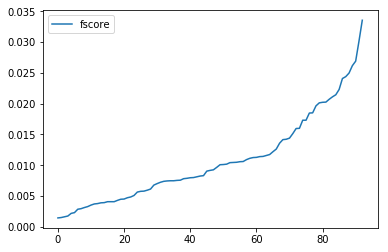

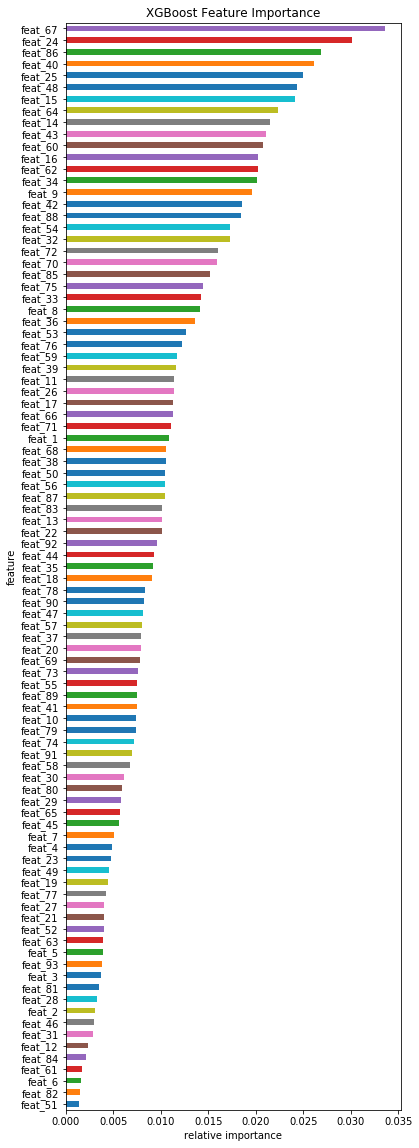

In [9]:
# # create a feature map
# outfile = open('xgb.fmap', 'w')
# i = 0
# for feat in features:
#     outfile.write('{0}\t{1}\tq\n'.format(i, feat))
#     i = i + 1
# outfile.close()

# # plot feature importance
# importance = gbm.get_fscore(fmap='xgb.fmap')
# importance = sorted(importance.items(), key=operator.itemgetter(1))
# df = pd.DataFrame(importance, columns=['feature', 'fscore'])
# df['fscore'] = df['fscore'] / df['fscore'].sum()
# plt.figure()
# df.plot()
# df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
# plt.title('XGBoost Feature Importance')
# plt.xlabel('relative importance')
# plt.gcf().savefig('feature_importance_xgb.png')



In [10]:
# create submission file
pred = pd.DataFrame(pred, index=sample.id.values, columns=sample.columns[1:])
pred.to_csv(savepath + 'submission.csv', index_label='id')

# 以下適当なコード

In [12]:
train = df.drop('target', axis=1)
# train *= 1
labels = df.target
# test = df_test

KeyError: "labels ['target'] not contained in axis"

In [1]:
f = partial(objective_optuna, train, labels)
study = optuna.create_study()
study.optimize(f, n_trials=1)

NameError: name 'partial' is not defined